# Statistics and Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import random 
import seaborn as sns
import statsmodels as sm


C:\Users\chand\AppData\Local\Temp\ipykernel_23820\3378108744.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
arr = np.array([1,2,4,5,7,8,3,4,5,5,5,5,5,5,5,5,5,5,8,9])
np.percentile(arr,[25,50,75])

array([4.75, 5.  , 5.  ])

### Decision Making Using P and Critical Value for Hypothesis Testing 

1. Define the statement of the hypothesis (clearly showing dependent and independent variables)
2. Establish the Null and Alternative Hypothesis 
3. Choose the appropriate type of tests based on the sample size, count (how many samples), data type, and objective
    - t-test 
    - z-test
    - chi-square test 
    - ANOVA
4. If not mentioned, define the level of significance (critical value) (most of the time it's 1% or 5%)
5. Obtain the p-value
6. Run the evaluation based on p-value and alpha
    - If the p-value is **greater** than alpha, **do NOT reject the null hypothesis** 
    - If the p-value is **less** than alpha, we **DO reject the null hypothesis** 


### Tests
#### t-test 
- when you're comparing the means of 2 groups to evaluate if they differ or not 
- when the data is close to a normal distribution 
- when you're comparing the means of two groups to evalulate if they differ or not (different samples)
- when you're comparing the effect of a variable in before and after situation (same sample)
- Types of t-tests
    - **independent sample t-test**: check the average of 2 independent, unrelated groups
        - $H_0$: $\mu_a$=$\mu_b$ i.e. no difference between the two groups 
    - **paired sample t-test**: checks if the average of 2 samples taken from the same population (i.e. before & afters)
        - $H_0$: $\mu_d$=0 
        - $H_a$: $\mu_d$ $\neq$ 0
    - **one sample t-test**: the average of a single group is different than the known average (population). 

##### Example problem: Independent t-test
**Scenario: A/B Testing for website conversion rates**

Imagine you work for an e-commerce company, and your team is responsible for optimizing the company's website to increase user engagement and, ultimately, sales. The current design of the "buy now" botton on the website is being tested against a new design to see if it leads to a higher conversion rate. 

Methodology: 
- randomly selected website users broken into 2 independent gropus (group A and B) 
- give group A the old website bottom and group B the new website 
- measure usage score 
- perform a statistical analysis to evaluate whether there is a difference in engagement between group A and B 

Hypthesis testing: 
- $H_0$: $\mu_a$=$\mu_b$
- $H_A$: $\mu_a$ $\neq$ $\mu_b$



In [3]:
#Create a function for p-val evaluation 
def hypothtest(p_val,alpha=0.05): 
    if p_val > alpha: 
        print("Accept the null hypothesis")
    else: 
        print("Reject the null hypothesis")

In [4]:
#EXERCISE: CREATE A RANDOM DATASET 
    #generate a sample of normally distributed data, we can use mean (mu) and SD (sigma) and Size (x)
    #build 2 randomly distributed dataset (Gaussian Distribution aka bell-shaped curve) and evaluate them 

a = [random.gauss(mu=50,sigma=20) for x in range(30)]
b = [random.gauss(mu=55,sigma=15) for x in range(30)]


<Axes: ylabel='Density'>

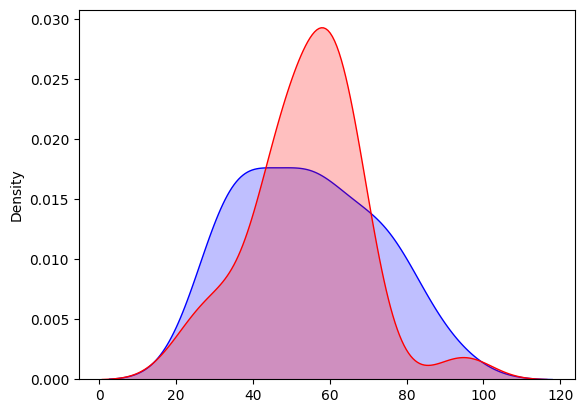

In [5]:
#Plot distibution
sns.kdeplot(a,fill=True,color='b')
sns.kdeplot(b,fill=True,color='r')


In [6]:
#Read in data 
df = pd.read_csv("C:\\Users\\chand\\Documents\\Git Repos\\AIML-1\\StatsDatasets\\AB_Testing_Website.csv")
df.head(10)

,Group_A,Group_B
0,38,47
1,34,48
2,35,50
3,35,49
4,35,46
5,37,46
6,40,50
7,34,46
8,34,43
9,38,46


In [7]:
#Isolate group A and group B - old website vs new website 
group_A = df['Group_A']
group_B = df['Group_B']

In [8]:
#Run the t-test 
t_stat, p_val = sts.ttest_ind(group_A, group_B)

hypothtest(p_val)

#if p_val > 0.05: 
#    print("Accept the null hypothesis: there is no difference")
#else: 
#    print("Reject the null: Group A and B are significantly different")



Reject the null hypothesis


In [9]:
#Rerun but does new button lead to a greater difference 
t_stat, p_val = sts.ttest_ind(group_A, group_B, alternative='greater') #alternative='less'

hypothtest(p_val)


Accept the null hypothesis


##### Example problem: One Sample T-Test
**Scenario: sample matches population**

Your org claims that the average age of its employees is 30 years old. You collect a sample of 10 employees age to check if the claim is true or not. We can use the hypothesis evaluation to test 

- $H_0$: $\mu_a$= X, there's no difference between sample and population 
- $H_A$: $\mu_a$ $\neq$ X, there's no difference between sample and population 

In [10]:
#define X, population mean 
pop_mean = 30 

In [11]:
#read in data 
df_ages = pd.read_csv('StatsDatasets/Ages.csv')
df_ages.shape #sample of 20, which is below 30, so we an use one-sample t-test (if above 30, use z-test)


(20, 1)

In [12]:
#evaluate 
t_stat, p_val = sts.ttest_1samp(df_ages,pop_mean)
print("tstat:", t_stat, "| pval:",p_val)
hypothtest(p_val)

tstat: [2.85505272] | pval: [0.01012962]
Reject the null hypothesis


##### Example problem: Paired sample t-test
For a particular hospital, it is advertised that a particular chemotherapy session does not affect the patient's health
based on blood pressure (BP).
It is to be checked if the BP before the treatment is equivalent to the BP after the treatment.
Perform a statistical significance at alpha=0.05 to help validate the claim.

--
1. Define the null and alternative hypothesis
- $H_0$: $\mu_d$ = 0, no difference in blood pressure before and after treatment
- $H_a$: $\mu_d$ $\neq$ 0, there is a difference in blood pressure before and after treatment



In [13]:
df_bp = pd.read_csv("StatsDatasets/blood_pressure.csv")


In [14]:
df_bp.head()
print(df_bp['bp_before'].mean())
print(df_bp['bp_after'].mean())


156.45
151.35833333333332


In [15]:
t_stat, p_val = sts.ttest_rel(df_bp['bp_before'],df_bp['bp_after']) #alternative = greater for directional difference

hypothtest(p_val)

Reject the null hypothesis


How does the chemo treatment affect blood pressure? 

In [16]:
df_bp['bp_before'].mean() > df_bp['bp_after'].mean()

True

Chemo treatment reduces the blook pressure.

## z-test
When to use: 
- the population variance is known 
- if the population variance is unknown, but the sample size is >30 

### example exercise
school principal claims that the students in his school are more intelligent than those of other schools. A random sample of 50 students' IQ scores has a mean score of 110. The mean population IQ is 100 with a standard deviation of 15. State whether the claim of the principal ir right or not at a 5% significance level 

$H_O$: $\mu_s$ = $\sigma_p$

$H_a$: $\mu_s$ $\neq$ $\sigma_p$

![SD](https://uedufy.com/wp-content/uploads/2022/03/image-3.png)

In [17]:
#sample info 
size_sample = 50 
mean_sample = 110

#population info 
mean_pop = 100 
sd_pop = 15 

In [18]:
import math

sd_sm = sd_pop/np.sqrt(size_sample)
print(f"The SD of the sample: {sd_sm:.2f}")

The SD of the sample: 2.12


In [19]:
#next, we can use mean, sd, size to generate out data based on normal distributino
student_sm = np.random.normal(mean_sample,sd_sm,size_sample)

In [20]:
from statsmodels.stats.weightstats import ztest

In [21]:
z_stat,p_val = ztest(x1=student_sm,value=mean_pop)
hypothtest(p_val)

Reject the null hypothesis


## Chi-Squared Tests
Ch-Square test helps identify the relationship between 2 or more categorical attributes

In [22]:
df_shop = pd.read_csv('StatsDatasets/Shopping.csv')
df_shop.head()

,Gender,Car Color
0,M,Black
1,M,Silver
2,M,Red
3,M,Black
4,M,Black


In [23]:
print(df_shop['Gender'].value_counts())

print(df_shop['Car Color'].value_counts())

print(df_shop['Car Color'].unique())


Gender
F    55
M    49
Name: count, dtype: int64
Car Color
Black     31
Silver    24
Pink      24
White     16
Red        9
Name: count, dtype: int64
['Black' 'Silver' 'Red' 'White' 'Pink']


- We have multiple categories and we have 2 categorical columns (variables or features)
- we are ready for Chi-squared evaulation 
- Steps: 
    1. define the null and alternative hypothesis
    2. Convert the evaluated variables into a crosstab (count aggregation)
    3. Calculate the Chi2 and p-value stats 
    4. Run the statistical test based on set alpha

Step 1: 

$H_0$: men and women have no difference in purchasing car colors 

$H_a$: men and women purchase different car colors 


In [24]:
#step 2: crosstab 
count_table = pd.crosstab(df_shop['Gender'],df_shop['Car Color'])
count_table

Car Color,Black,Pink,Red,Silver,White
Gender,,,,,
F,9,22,2,8,14
M,22,2,7,16,2


In [25]:
#calculate the chi-squared and p-val stats
from scipy.stats import chi2_contingency as chi2c

results = chi2c(count_table)
print(results)
print(results.pvalue)

#The outputs: 
    #statistic: float. the test statistic
    #p-value: float. p-val for the test 
    #DoF: int. degrees of freedom 
    #expected_freqnd: array, same shape as given. 

Chi2ContingencyResult(statistic=36.33751604258517, pvalue=2.466054233511132e-07, dof=4, expected_freq=array([[16.39423077, 12.69230769,  4.75961538, 12.69230769,  8.46153846],
       [14.60576923, 11.30769231,  4.24038462, 11.30769231,  7.53846154]]))
2.466054233511132e-07


In [26]:
#let's convert the expected freq into a dataframe 
expDF= pd.DataFrame(data=results.expected_freq,
                     index=['F','M'],
                     columns=['Black','Silver','Red','White','Pink'])
print(expDF)
print('')
hypothtest(results.pvalue)

       Black     Silver       Red      White      Pink
F  16.394231  12.692308  4.759615  12.692308  8.461538
M  14.605769  11.307692  4.240385  11.307692  7.538462

Reject the null hypothesis


## ANOVA 
- Analysis of Variance 
- Assesses whether the means of multiple groups are statistically significant from each other or not. 
- t-test and z-test are limited to 2-group evaluation only. ANOVA can do 2 or more groups 
- the stat result is called f-stat named after Fisher 
- Types: 
    - One-Way ANOVA: one factor for multiple groups e.g. student IQ evaluation for 3 different classes 
    - two-way ANOVA: two factors for multiple groups e.g. student IQ & Age evaluation for 3 different classes 
    - MANOVA: multiple factors for multiple groups 

Example: 
Suppose you are a researcher conducting an agricultural study to compare the yield of three different fertilizer treatments (A,B,C) on a specific type of crop. You want to determine if there are significant differences in crop yields among the treatments. 

$H_0$: mean crop yield are the same 
$H_a$: at least one crop yield is different

In [27]:
df_crop = pd.read_csv('StatsDatasets/crop_yield_treatment.csv')
df_crop.head()

,Treatment_A,Treatment_B,Treatment_C
0,50,56,49
1,54,47,57
2,57,55,46
3,49,41,40
4,46,56,54


In [28]:
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(df_crop['Treatment_A'],df_crop['Treatment_B'],df_crop['Treatment_C'])
hypothtest(p_val)

Accept the null hypothesis


## Mann-Whitney U Test
- sometimes there's a drawback to the performance of z-test if the data isn't normally distributed 
- this is a non-parametric test used for non-normal distributions and smaller sample sizes 
- to check distribution, look at skewness

Example: evaluate if the sample of university of dallas is similar to Arizona. Evaluate if the salaries are similar or different 


In [31]:
df_sal = pd.read_csv('StatsDatasets/Mann-Whitney_U_Salaires.csv')
df_sal.head()

,UnivOfDallas,ArizonaStateUniv
0,71555,73589
1,67887,83621
2,84334,74681
3,70133,83873
4,89304,72350


<Axes: >

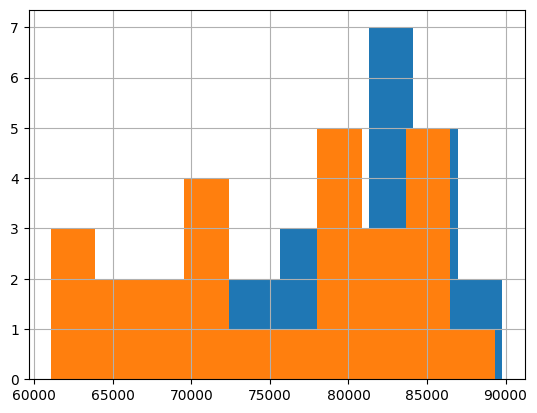

In [33]:
df_sal['ArizonaStateUniv'].hist()
df_sal['UnivOfDallas'].hist()
#both columns are not normally distributed

In [34]:
from scipy.stats import mannwhitneyu as mw 
stat, pval = mw(df_sal['ArizonaStateUniv'],df_sal['UnivOfDallas'])
hypothtest(pval)

Accept the null hypothesis
